In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

In [64]:
raw_data = pd.read_csv(r"D:\Users\mathe\OneDrive\Documentos\Data Science\Dados\real_estate_price_size_year_view.csv")

In [65]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [66]:
data = raw_data.copy()

In [67]:
data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [68]:
data["view"] = data["view"].map({"No sea view":0, "Sea view":1})

In [69]:
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [70]:
data.describe(include="all")

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


In [71]:
y = data["price"]
x1 = data[["size", "year", "view"]]

In [72]:
x1

,size,year,view
0,643.09,2015,0
1,656.22,2009,0
2,487.29,2018,1
3,1504.75,2015,0
4,1275.46,2009,1
...,...,...,...
95,549.80,2009,1
96,1037.44,2009,0
97,1504.75,2006,0
98,648.29,2015,0


In [73]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.02e-50
Time:                        16:49:51   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

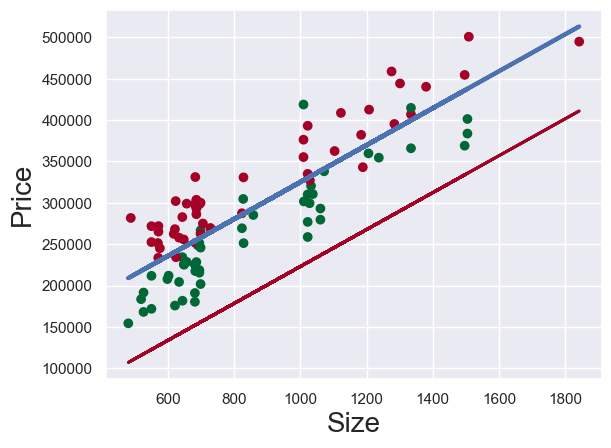

In [74]:
plt.scatter(data["size"], y, c = data["view"], cmap = "RdYlGn_r")
yhat_NoView = -5.398000 + 223.0316*data["size"]
yhat_View = -5.398000 + 223.0316*data["size"] + 56.730*data["view"]
yhat = data["size"]*223.1787 + 101900
fig = plt.plot(data["size"], yhat_NoView, lw = 2, c = "#006837", label = "Regression Line 1") # Green
fig = plt.plot(data["size"], yhat_View, lw = 2, c = "#a50026", label = "Regression Line 2") # Red
fig = plt.plot(data["size"], yhat, lw = 3, c = "#4C72B0", label = "Regrression Line") # Blue
plt.xlabel("Size", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.show()
# + 2718.9489*data["year"]